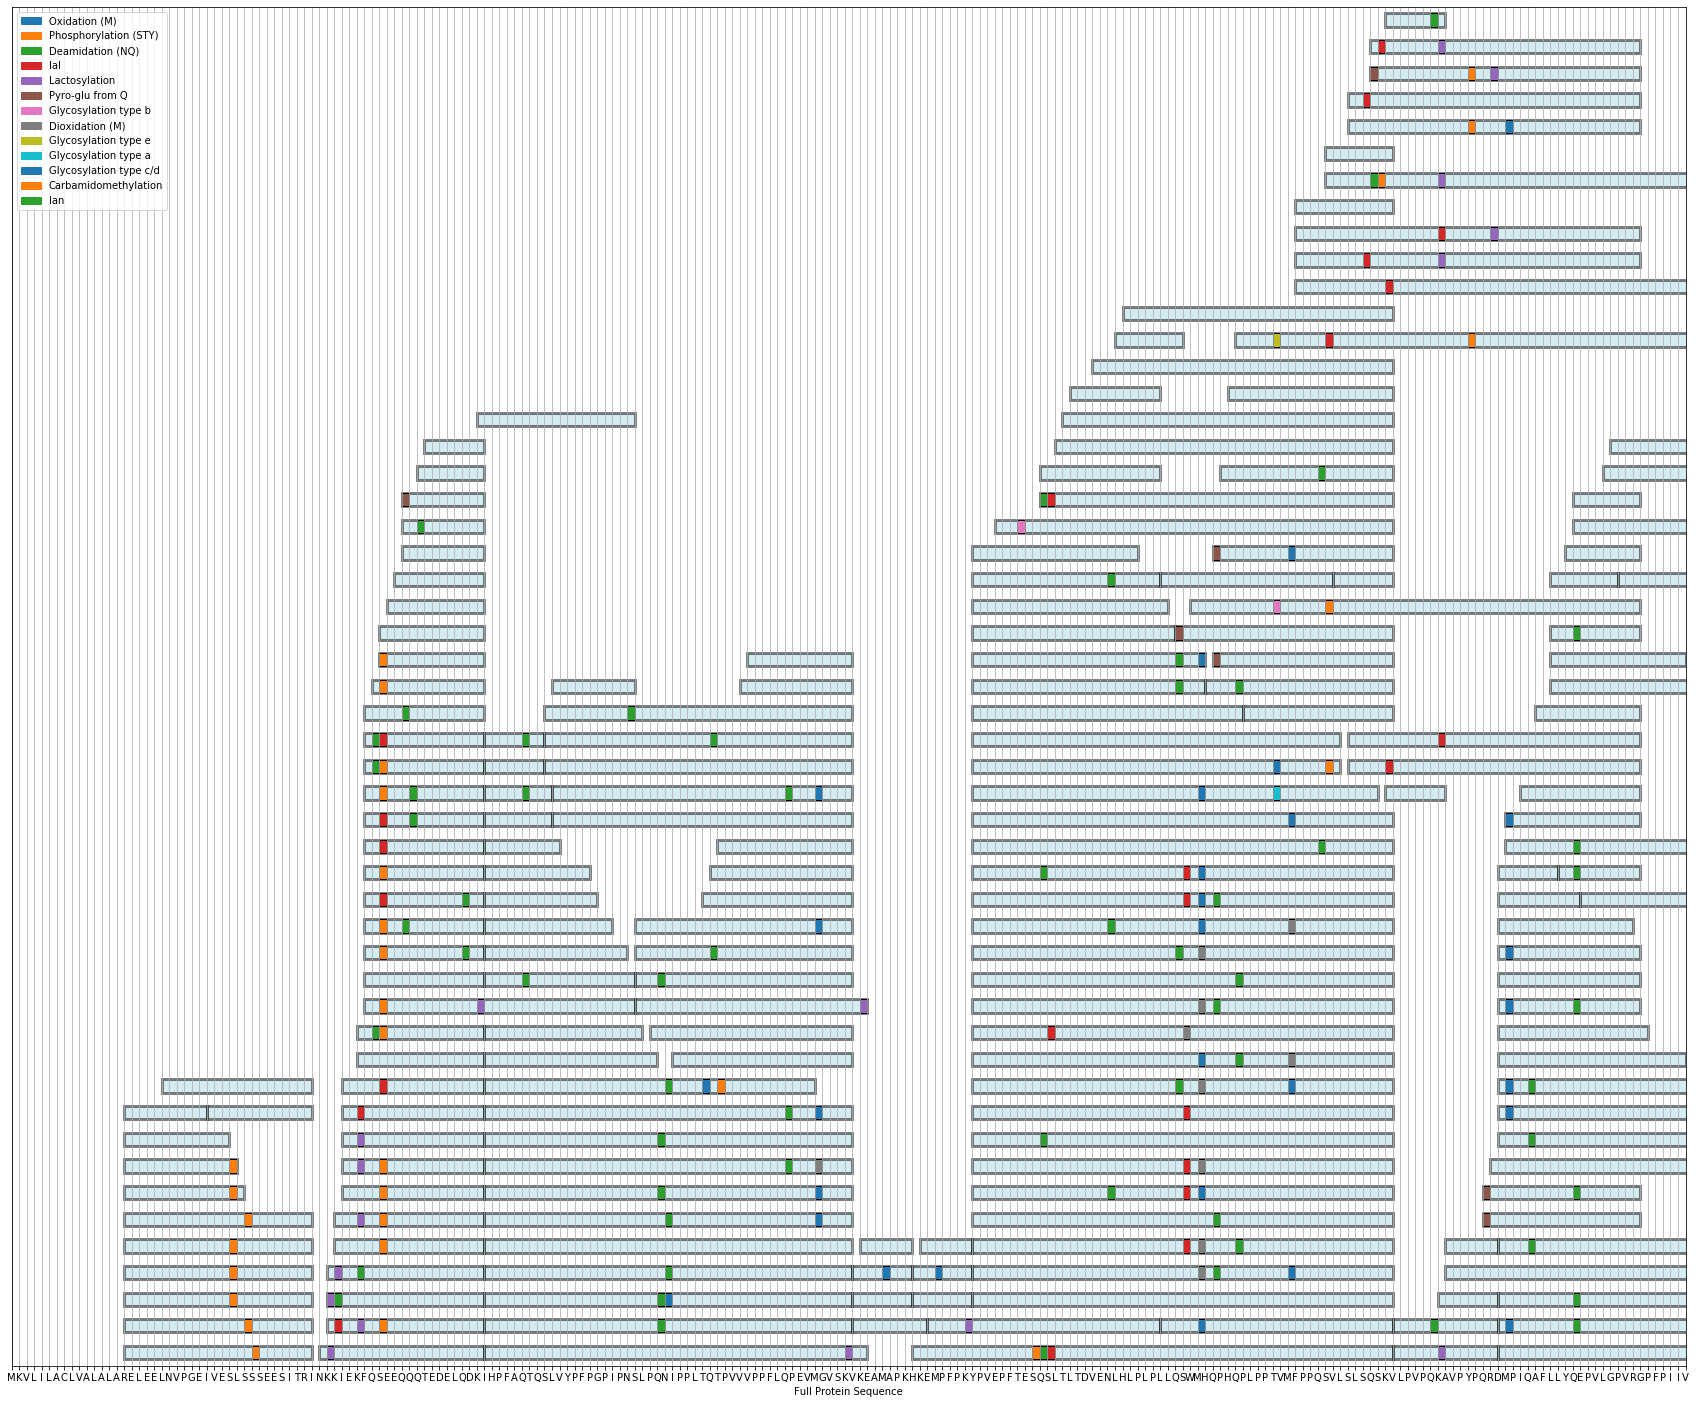

In [2]:
from utils import get_data_and_remove_unwanted_columns, sanitize_data, preprocess_data_for_peptide_segment_plot, get_peptide_segments_and_modifications, plot_peptide_segments, normalize_intensities_by_protein_intensity, split_data_in_samples, get_protein_sequence, get_overlap_overlaps_by_intensity_and_sample, get_overlap_pixel_plot, get_gradient_plot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

df = get_data_and_remove_unwanted_columns()
df = sanitize_data(df)
dfs = normalize_intensities_by_protein_intensity(df)

data = preprocess_data_for_peptide_segment_plot(df, size=200)
rectatngles, modifications, height = get_peptide_segments_and_modifications(data, 0.5)
plot_peptide_segments(rectatngles, modifications, height)

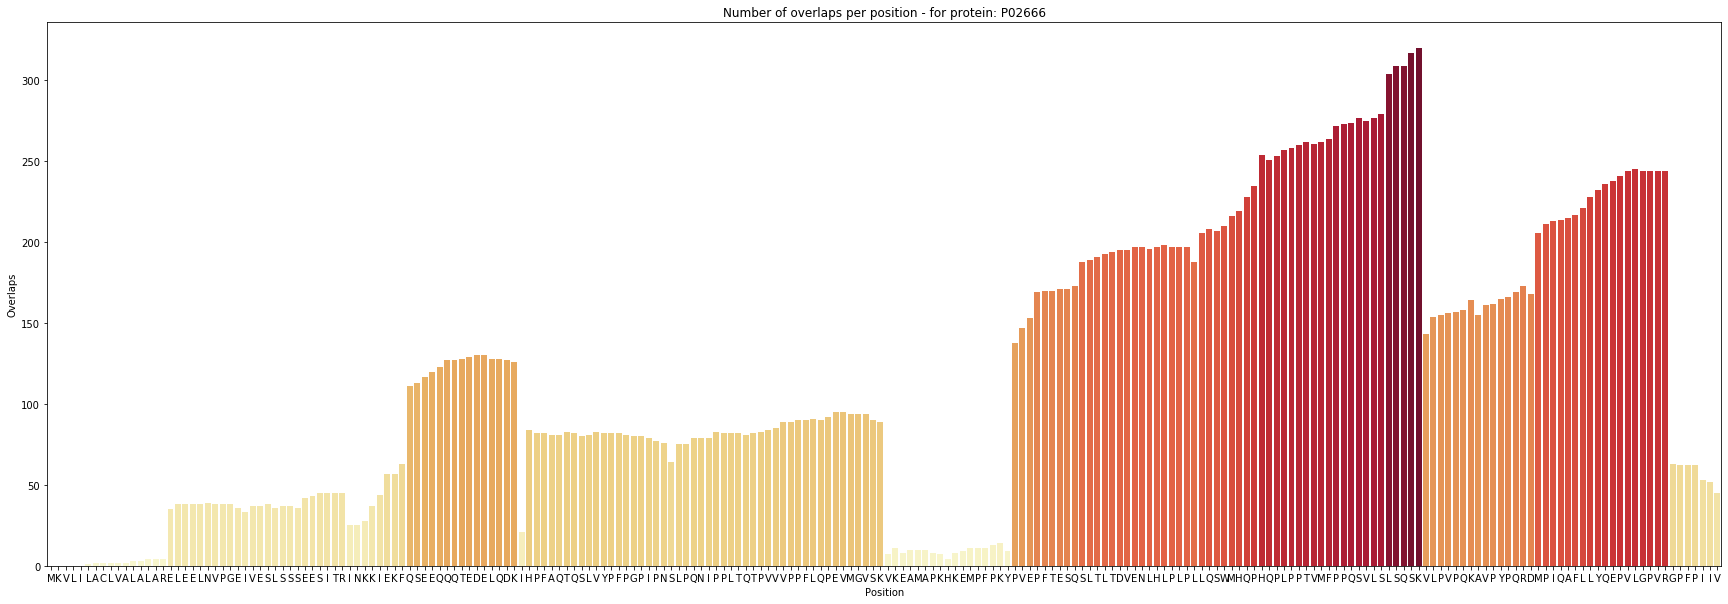

In [2]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

def plot_overlap_barchart2(df, selected_protein= "P02666"):
    df_new = df[df["Protein Accession"] == selected_protein]
    seq_list = list(get_protein_sequence(selected_protein))
    _len = len(seq_list)
    num_overlpas_list = [0]*_len # init as zeroes
    # add 1 into all positions where there is an overlap
    for i in range(len(df_new)):
        for j in range(df_new.iloc[i]['Start'], df_new.iloc[i]['End']):
            num_overlpas_list[j] += 1
    df_overlaps = pd.DataFrame(list(zip(range(_len), num_overlpas_list)), columns=['Position', 'Overlaps'])
    plt.figure(figsize=(30,10))
    g= sns.barplot(x="Position", y= "Overlaps", data= df_overlaps, palette=colors_from_values(np.asarray(num_overlpas_list), "YlOrRd"))
    g.set_xticklabels(seq_list)
    g.set_title(f"Number of overlaps per position - for protein: {selected_protein}")
    return g  

plot_overlap_barchart2(df)

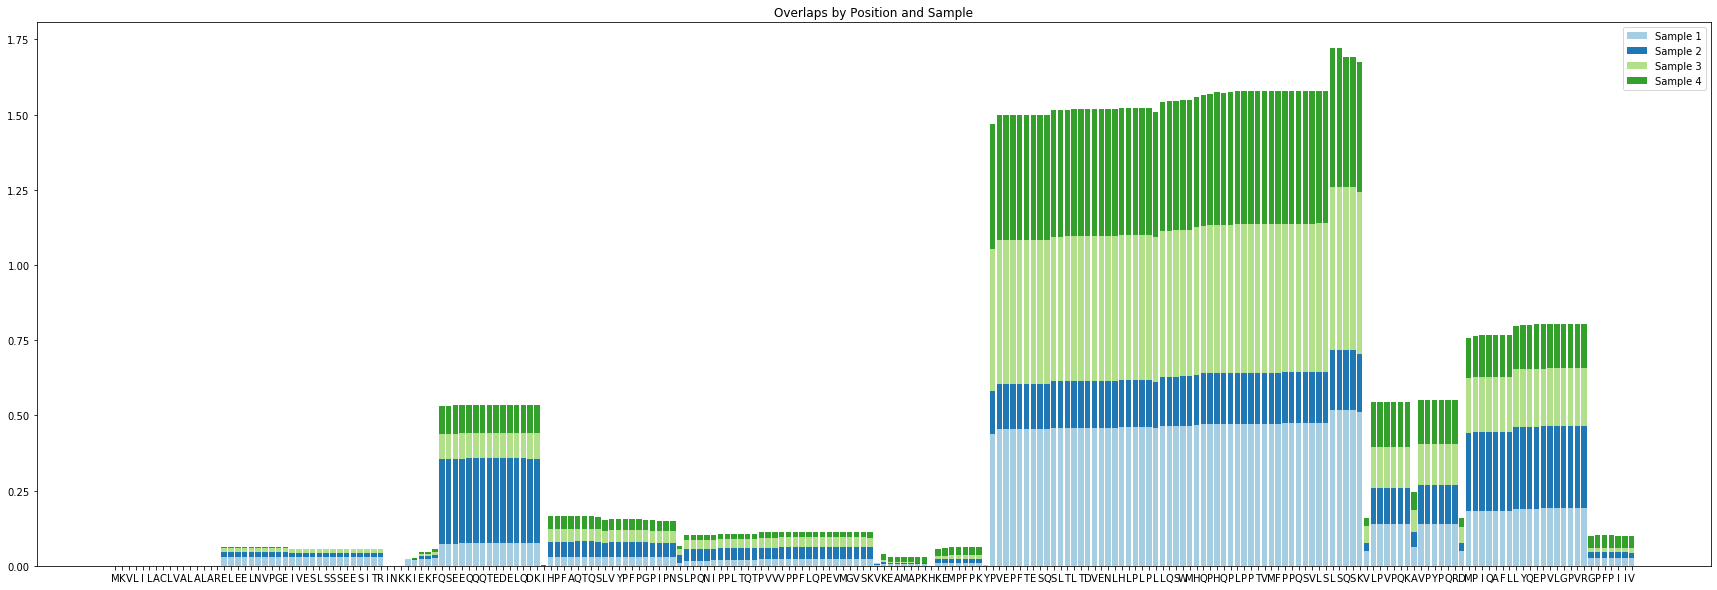

In [16]:
first = dfs[0]

lists, dataframes = get_overlap_overlaps_by_intensity_and_sample(first, "P02666")

seq_list = list(get_protein_sequence("P02666"))
fig, ax = plt.subplots(figsize = (30, 10))
ax.set_xticks(range(len(lists[0])))
ax.set_xticklabels(seq_list)

ax.bar(dataframes[0]['Position'], dataframes[0]['Overlaps'], label='Sample 1', color = '#A6CEE3')
ax.bar(dataframes[1]['Position'], dataframes[1]['Overlaps'], bottom=dataframes[0]['Overlaps'], label='Sample 2', color='#1F78B4')
ax.bar(dataframes[2]['Position'], dataframes[2]['Overlaps'], bottom=dataframes[1]['Overlaps'] + dataframes[0]['Overlaps'], label="Sample 3", color='#B2DF8A')
ax.bar(dataframes[3]['Position'], dataframes[3]['Overlaps'], bottom=dataframes[2]['Overlaps'] + dataframes[1]['Overlaps'] + dataframes[0]['Overlaps'], label="Sample 4", color='#33A02C')

ax.set_title('Overlaps by Position and Sample')
ax.legend()

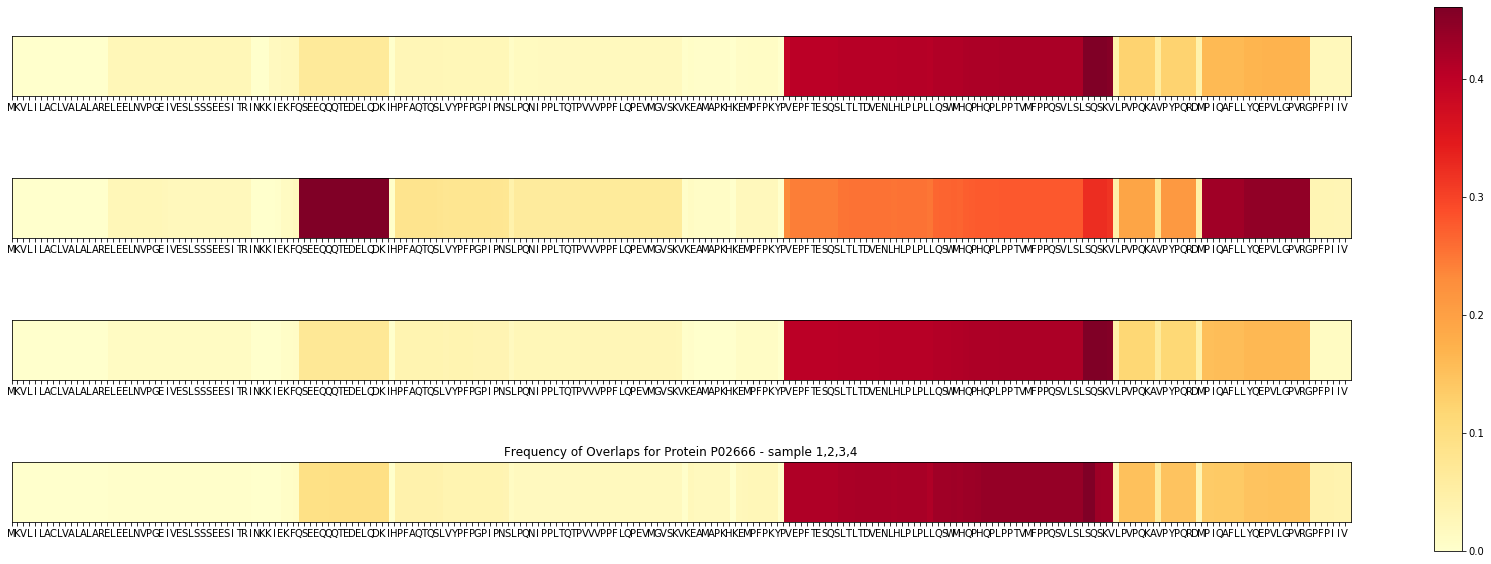

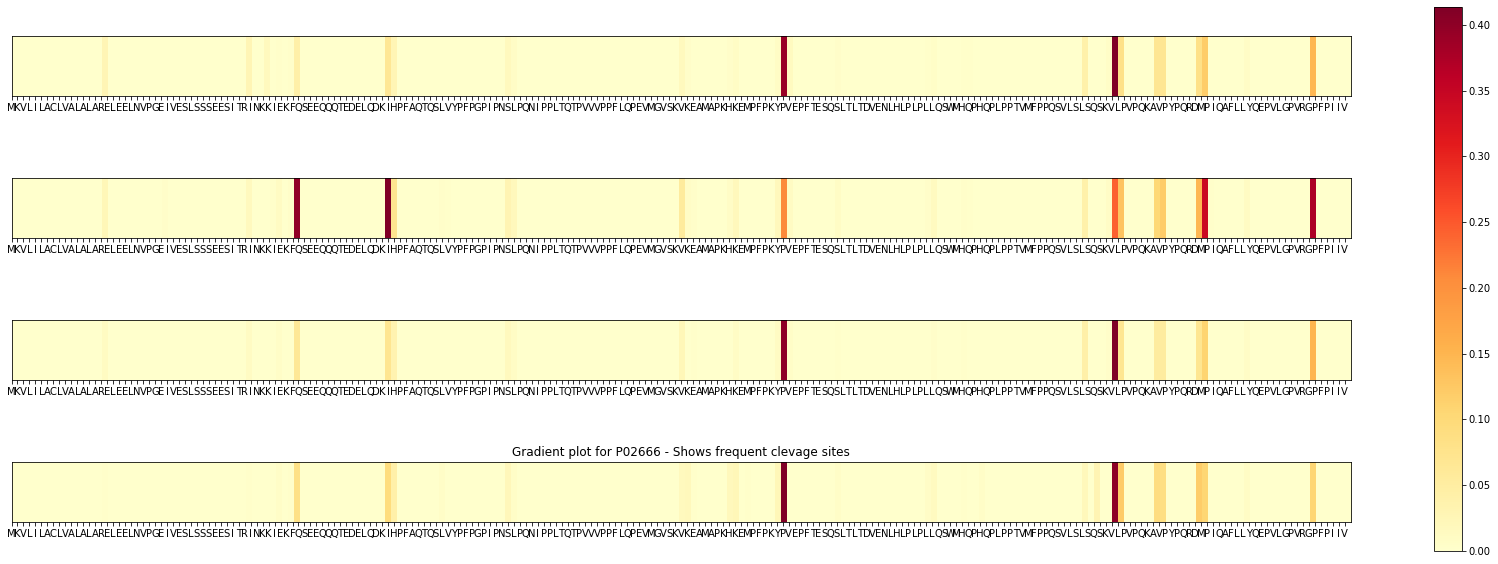

In [4]:
get_overlap_pixel_plot(lists, seq_list, "P02666")

get_gradient_plot(lists, seq_list, "P02666")

TypeError: Invalid object type at position 0

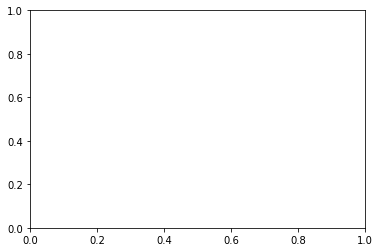

In [21]:
first['Total Intensity'] = first['Area Sample 1'] + first['Area Sample 2'] + first['Area Sample 3'] + first['Area Sample 4']
first['index'] = first.index
first = first.sort_values(by='Total Intensity')

first['quatile_ex 1'] = pd.qcut(first['Total Intensity'], q=5)
first['quatile_ex 1'].value_counts()

sns.barplot()
[0-10, 10-30, 30-70, 70-90, 90-100 ]